## 1. Import libraries

In [47]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 2. Load the data 

In [2]:
data = pd.read_csv('creditcardmarketing.csv')
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


### 2.1. Clean the columns and save as a new file (credit_card_data) to import into SQL Workbench
Column cleaning
- lower case
- replace space to '_'
- remove #
- save the dataframe as new file

In [3]:
data.columns = [columns.lower().replace(' ', '_').replace('# ', '') for columns in data.columns]
data.columns = [columns.replace('#_', '') for columns in data.columns]

data

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


#### Now save the dataframe into csv file to import it into MySQL Workbench

In [4]:
data.to_csv('credit_card_data.csv', index=False)
data.to_excel('credit_card_data.xls', index=False)

## 3. Data analysis on SQL 
Please refer to the mysql file

## 4. Data exploration & cleaning


### 4.1 Check the stats of the data

In [5]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
data.shape

(18000, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### 4.2 Drop duplicates
No duplicates found

In [9]:
data = data.drop_duplicates()

data.shape

(18000, 17)

### 4.3 Check Null values

In [10]:
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [11]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
q4_balance,0.133333
q3_balance,0.133333
q2_balance,0.133333
q1_balance,0.133333
average_balance,0.133333
homes_owned,0.000000
own_your_home,0.000000
household_size,0.000000
customer_number,0.000000
offer_accepted,0.000000


In [12]:
data_null = data[data.isna().any(axis=1)]
data_null

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [13]:
data['q4_balance'].value_counts()

154.0     26
419.0     26
497.0     26
297.0     24
441.0     24
          ..
1089.0     1
1553.0     1
2124.0     1
2035.0     1
2155.0     1
Name: q4_balance, Length: 2184, dtype: int64

#### 4.3.1 Fill in Null values with the mean
- From above data_null dataframe, all 24 rows consists of null values in same columns
- since the values are all numerical, null values will be replaced with the mean

In [14]:
columns = ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

for col in columns:
    mean_value = data[columns].mean()
    data[columns] = data[columns].fillna(mean_value)
    

In [15]:
data.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [16]:
data.describe() # check if the null values are correctly filled with mean

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### 4.4 Check the imbalance of the target values


In [17]:
data['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

### 4.5 Check the data types (numericals)

In [18]:
data_num = data.select_dtypes(np.number)
data_num

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17995,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


### 4.4.1 Drop customer_number
Customer_id is a unique value so there are 2 option (drop or change into Index). In this project the customer_number will be dropeed

In [19]:
data = data.drop(['customer_number'], axis =1)
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### 4.4 Check the data types (categoricals)

In [20]:
data_cat = data.select_dtypes(np.object)
data_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


### Data exploration and cleaning completed

## 5. Data visualization
Objectives
- 5.1: Check overview of categorical and numerical data
- 5.2: Are there any relationship between customer's income level and the customer who accepted the offer?
- 5.3: Does customer who already have more than 1 credit card would accept the offer?
- 5.4. Are there any relationship of offer accept and the household size?

### 5.1 Check categorical data

In [21]:
data_vis = data.copy()
data_vis

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


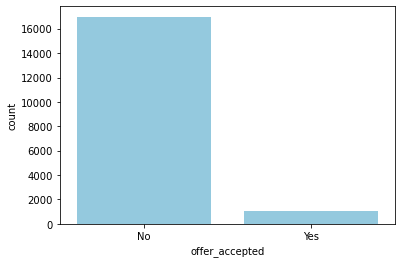

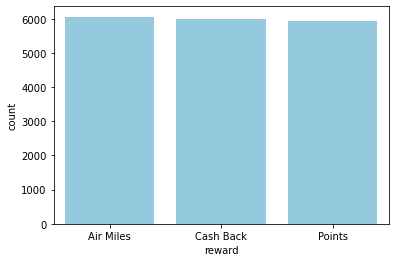

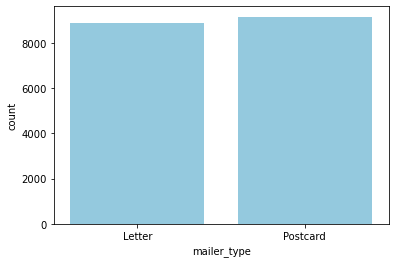

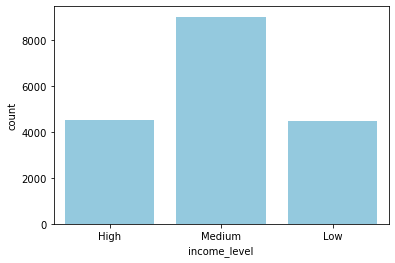

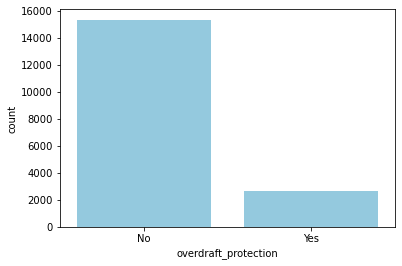

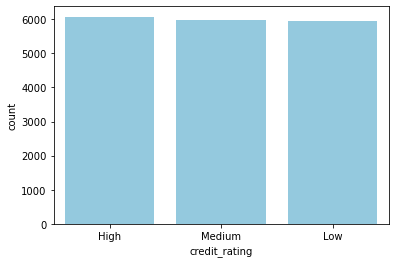

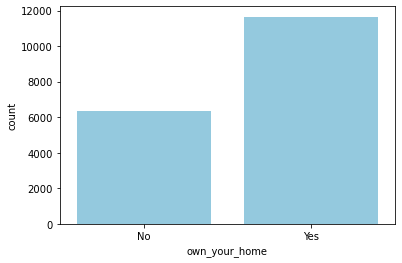

In [22]:
# See the data in the categorical columns
for column in data_vis.select_dtypes(np.object):
    sns.countplot(column, data = data_vis, color = 'skyblue')
    plt.show()

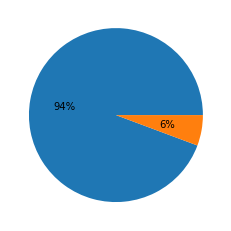

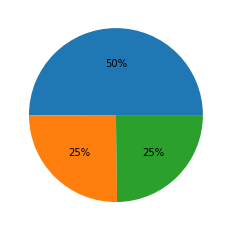

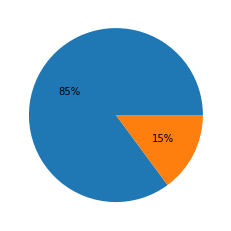

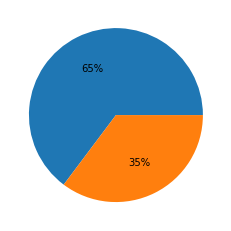

In [23]:
# See the percentile in the categorical columns
columns = ['offer_accepted', 'income_level', 'overdraft_protection', 'own_your_home']
#for column in data_vis.select_dtypes(np.object):
for col in columns:
    plt.pie(data[col].value_counts(), autopct='%1.0f%%')
    
    plt.show()

#### Findings in categorical columns:
- Imbalance data in target variable (column: 'offer_accepted'): 94% (No) vs 6% (Yes)
- Almost equal distrubution on columns: reward, mailer_type, credit_rating
- 50% of the customers are belonging to medium income_level
- 85% of customer have overdraft_protection
- 65% of the customer owns a home

### 5.1 Check numerical data

In [24]:
data_vis.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

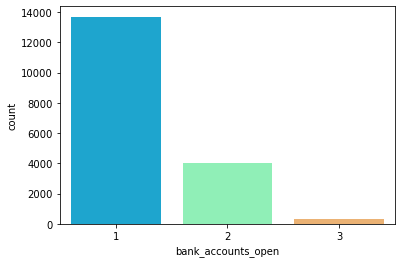

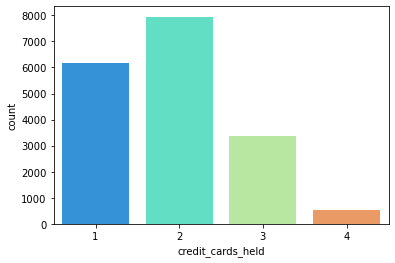

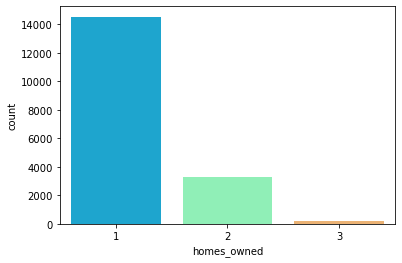

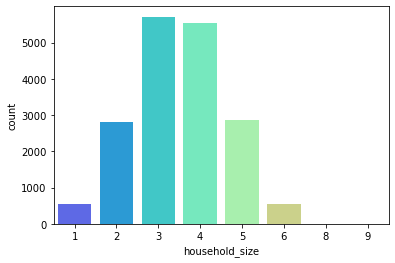

In [25]:
columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']
for col in columns:
    sns.countplot(col, data = data_vis, palette = 'rainbow')
    plt.show()

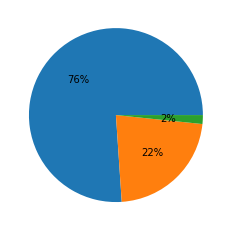

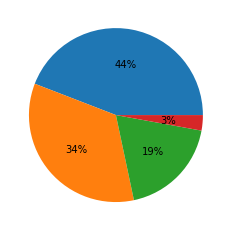

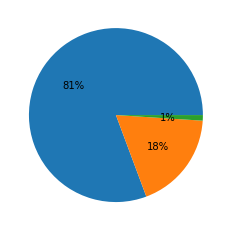

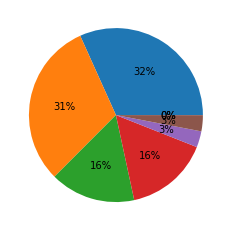

In [26]:
# See the percentile in the categorical columns
columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']
#for column in data_vis.select_dtypes(np.object):
for col in columns:
    plt.pie(data[col].value_counts(), autopct='%1.0f%%')
    
    plt.show()

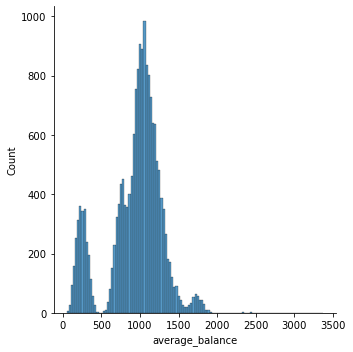

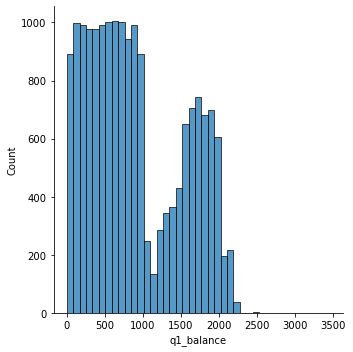

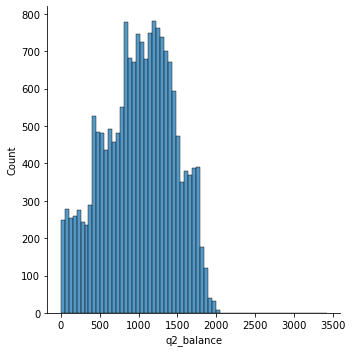

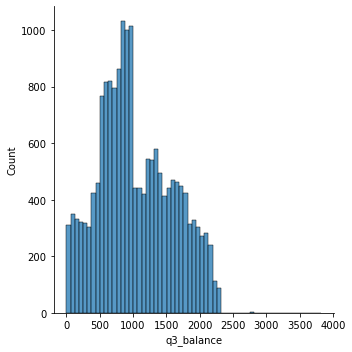

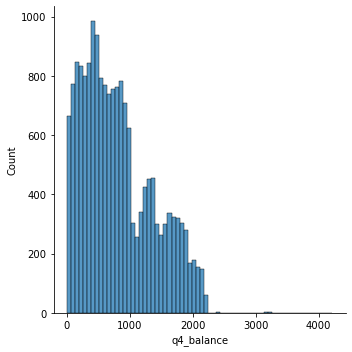

In [27]:
columns = ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance']
for col in columns:
           sns.displot(data_vis[col])
           plt.show()
           

#### Findings in numerical columns
- 76% of the customer owns 1 bank account
- 81% of the customer owns their home
- The average_blanace and q1_balance is skewed to the left



### 5.2. Relationship between customer's income level and the customer who accepted the offer

<AxesSubplot:xlabel='income_level', ylabel='count'>

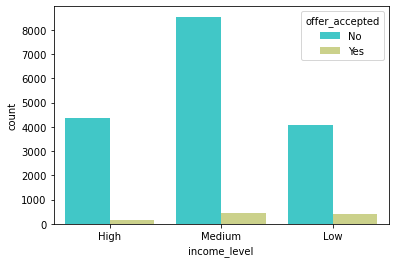

In [28]:

sns.countplot(x = 'income_level', hue = 'offer_accepted', data = data_vis, palette = 'rainbow' )


Findings:
- higher tendency of medium income level accepts the offer

### 5.3. Does customer who already have more than 1 credit card would accept the offer?

<AxesSubplot:xlabel='credit_cards_held', ylabel='count'>

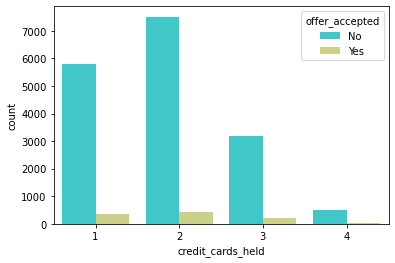

In [29]:

sns.countplot(x = 'credit_cards_held', hue = 'offer_accepted', data = data_vis, palette = 'rainbow' )


Findings:
- customer who holds 1 or 2 credit cards tends to accept the offer
- most customer who holds 4 credit cards did not accept the offer

### 5.4. Relationship of offer accept and the household size

<AxesSubplot:xlabel='household_size', ylabel='count'>

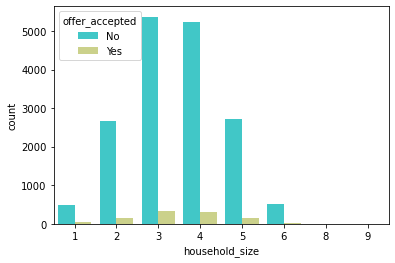

In [30]:
sns.countplot(x = 'household_size', hue = 'offer_accepted', data = data_vis, palette = 'rainbow' )


Findings:
- household_size of 3 to 4 people tend to accept the offer more

### Summary of offer accepted customers
- medium income level families
- holding 1-2 credit cards today
- household_size between 3 to 4 people 

## 6. EDA

In [31]:
data1 = data.copy() # make a copy of the data so the cleaned data is not lost

### 6.1 Correlation matrix

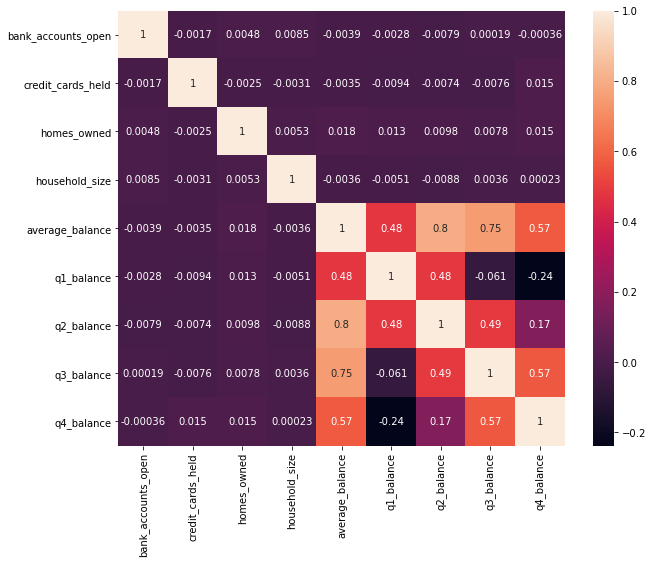

In [32]:
corr_matrix=data1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Findings:
- high correlations between average_balance and q2_balance, q3_balance
- drop average_balance

In [33]:
data1 = data1.drop('average_balance', axis = 1)
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,626.0,983.0,865.0,1615.0


### 6.2 check the data distribution

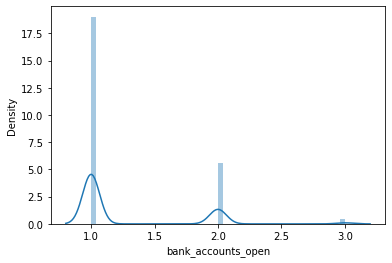

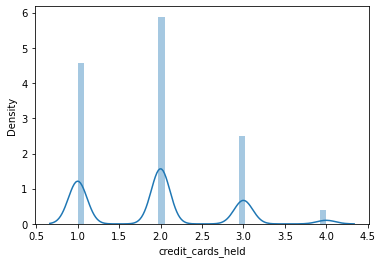

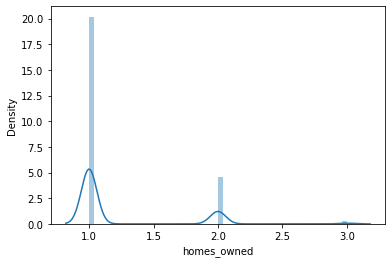

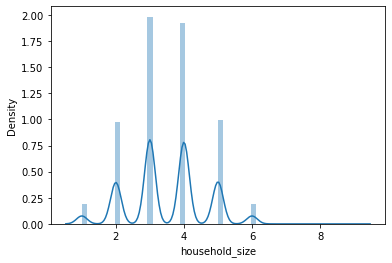

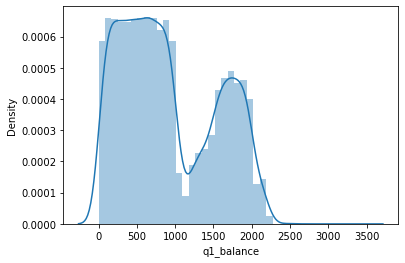

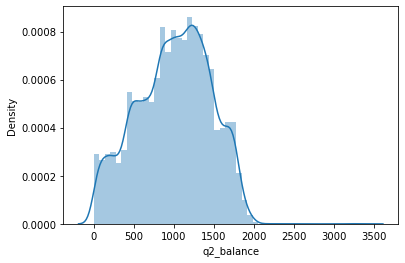

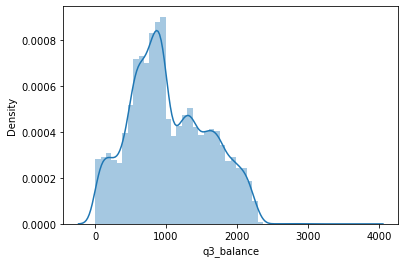

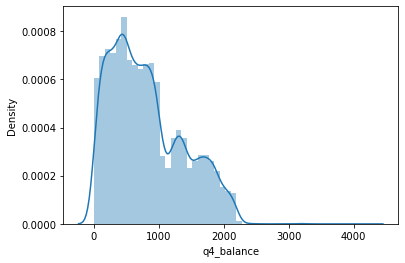

In [34]:

for column in data1.select_dtypes(np.number).columns:
    sns.distplot(data1[column])
    plt.show()

## 7. Data processing, feature engineering

In [35]:
data1.shape

(18000, 15)

### 7.1 Apply boxcox transform
boxcox will use all lambdas to see the best transformation for each column

In [36]:
def boxcox_transform(data1):
    numeric_cols = data1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data1[column] = np.where(data1[column]<=0, np.NAN, data1[column]) 
        data1[column] = data1[column].fillna(data1[column].mean())
        #print(column)
        transformed_data, ci = stats.boxcox(data1[column])
        data1[column] = transformed_data
        _ci[column] = [ci] 
    return data1, _ci

In [37]:
data1, _ci = boxcox_transform(data1)
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.818039,No,74.088196,641.948172,174.455505,50.666453
1,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.712548,Yes,10.171719,86.052504,27.370949,30.993842
2,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.971838,Yes,34.365591,270.063072,42.616073,25.219542
3,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.818039,No,72.037644,1241.725907,177.086014,33.134063
4,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.000000,4.593784,Yes,83.885335,970.704172,161.815636,30.951910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.712548,Yes,20.406124,53.788326,25.573506,32.304514
17996,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.906588,Yes,56.816308,685.562516,157.348155,37.358270
17997,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.818039,No,54.859399,565.381288,182.617563,61.387229
17998,No,Cash Back,Letter,Medium,0.000000,No,Medium,1.555081,0.142198,0.971838,Yes,45.180070,715.239852,148.233804,63.718093


### 7.2 Remove the outliers 
See 6.3 boxplot

In [38]:
# define the function of removing the outliers
def remove_outliers(data1, threshold=1.5, in_columns=data1.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data1[column],75)
            lower = np.percentile(data1[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data1 = data1[(data1[column]>lower_limit) & (data1[column]<upper_limit)]
    return data1


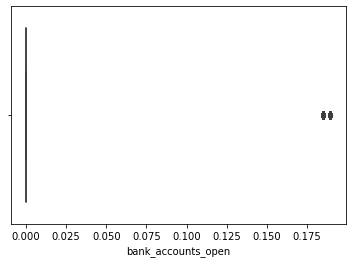

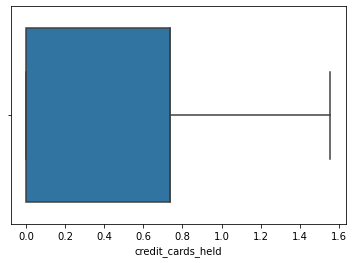

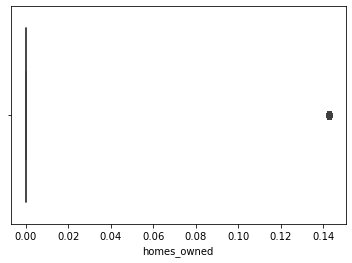

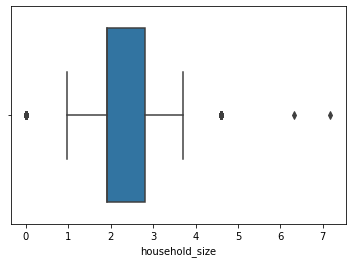

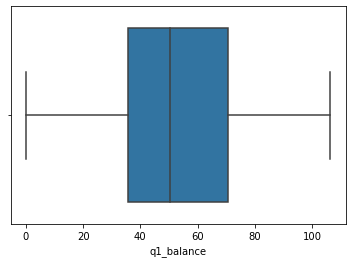

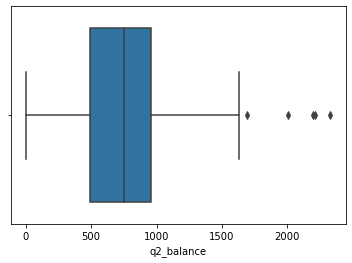

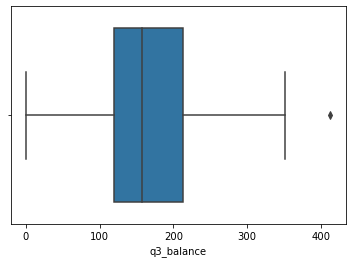

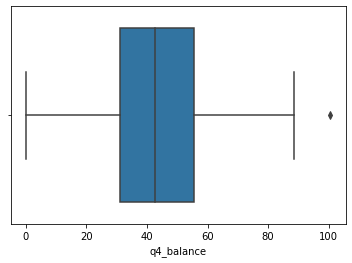

In [39]:

for column in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[column])
    plt.show()

Findings:
- outliers in columns: household_size, average_balance, q2_balance, q3_balance, q4_balance

In [40]:
data1 = remove_outliers(data1, threshold=1.5, in_columns= ['household_size', 'q2_balance', 'q3_balance', 'q4_balance'])
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.818039,No,74.088196,641.948172,174.455505,50.666453
1,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.712548,Yes,10.171719,86.052504,27.370949,30.993842
2,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.971838,Yes,34.365591,270.063072,42.616073,25.219542
3,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.818039,No,72.037644,1241.725907,177.086014,33.134063
5,No,Air Miles,Letter,Medium,0.000000,No,High,1.202918,0.000000,2.818039,No,77.939556,976.122896,134.305789,36.034178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.712548,Yes,20.406124,53.788326,25.573506,32.304514
17996,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.906588,Yes,56.816308,685.562516,157.348155,37.358270
17997,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.818039,No,54.859399,565.381288,182.617563,61.387229
17998,No,Cash Back,Letter,Medium,0.000000,No,Medium,1.555081,0.142198,0.971838,Yes,45.180070,715.239852,148.233804,63.718093


## 8: Extract the target variable

### 8.1 X,y split

In [41]:
X = data1.drop('offer_accepted', axis =1)
y = data1['offer_accepted']

In [42]:
### 8.2 Scaling - standardization the numericals

In [43]:
numericals = X.select_dtypes(np.number)

In [44]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

### 8.2 Encoding

In [45]:
categoricals = X.select_dtypes(exclude=np.number)

In [48]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [51]:
X = np.concatenate((x_standardized, encoded), axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X = np.concatenate((x_standardized, encoded), axis=1)

## 9. Scaling the imbalanced data (SMOT)

In [54]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     15964
Yes    15964
Name: offer_accepted, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [56]:
X_train

array([[ 1.777062  ,  0.29373526, -0.4889632 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56149759,  1.28149566, -0.4889632 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.56149759, -1.25102556, -0.4889632 , ...,  0.        ,
         0.        ,  0.0596658 ],
       ...,
       [ 1.777062  ,  0.29373526, -0.4889632 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.56149759, -1.25102556, -0.4889632 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56149759, -1.25102556, -0.4889632 , ...,  0.        ,
         0.        ,  1.        ]])

In [57]:
X_test

array([[-0.56149759, -1.15900743, -0.4889632 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.56149759,  0.29373526, -0.4889632 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.777062  , -1.25102556, -0.4889632 , ...,  0.98456992,
         0.        ,  0.01543008],
       ...,
       [-0.56149759,  0.29373526, -0.4889632 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.56149759, -1.25102556, -0.4889632 , ...,  1.        ,
         0.        ,  0.09935659],
       [-0.56149759,  0.29373526, -0.4889632 , ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

## 9.1 Model evaluation

In [59]:
classification.score(X_test, y_test)

0.7070153460695271

In [60]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[2208, 1041],
       [ 830, 2307]])

<AxesSubplot:>

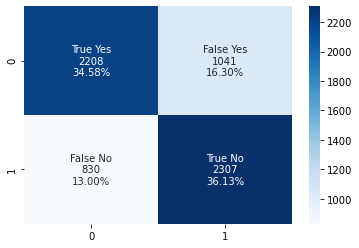

In [61]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Yes', 'False Yes', 
               'False No', 'True No'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## 10. KNN classifier

In [62]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [63]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8974318822424052
